In [1]:
from openbabel import pybel
from rdkit import Chem
import rdkit
from rdkit import RDPaths
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem.PandasTools import LoadSDF
# from rdkit import RDLogger
# lg = RDLogger.logger()
# lg.setLevel(RDLogger.CRITICAL)

import os
import numpy as np
import warnings
from tqdm import tqdm
import pandas as pd
import pickle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from analysis.xyz_converter import *

# xyz file conversion

In [2]:
current_path = os.getcwd()
os.chdir("..")
repo_path = os.getcwd()
os.chdir(current_path)

In [3]:
# collect code list
files = os.listdir(repo_path+'/converted_sdf')
code_list = []
for file in files:
    #file_list.append(file)
    code = file.split('.')[0]
    code_list.append(code)

## (1) xyz --> smiles --> mol --> fingerprints

In [20]:
def xyz_to_fp(code, fpsize, fptype):
    path = repo_path+'/filtered_xyz_data/'
    if fptype == "rdkit":
        try: 
            s = xyz_to_smiles(path+code+".xyz")
            m = Chem.MolFromSmiles(s)
            fp = Chem.RDKFingerprint(m, fpSize = fpsize)
        except:
            fp = None
            #pass
    if fptype == "morgan":
        try: 
            s = xyz_to_smiles(path+code+".xyz")
            m = Chem.MolFromSmiles(s)
            fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, fpsize)
        except:
            fp = None
            #pass
    return np.array(fp)

In [ ]:
# def xyz_to_fp2(code_list, fpsize, fptype, use_tqdm = False):
#     path = repo_path+'/filtered_xyz_data/'
#     fp_result = {}
#     if use_tqdm:
#         from tqdm import tqdm
#         code_list = tqdm(code_list)
#     for code in code_list:
#         s = xyz_to_smiles(path+code+".xyz")
#         m = Chem.MolFromSmiles(s)
   
#     if fptype == "rdkit":
#         fp = [Chem.RDKFingerprint(x, fpSize = 1024) for x in mols if x is not None]

#     elif fptype == "morgan":    
#         morgan_fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols if x is not None] 

        
#         df_rdkit_fps = pd.DataFrame(np.array(rdkit_fps))
# df_morgan_fps = pd.DataFrame(np.array(morgan_fps)) 

In [23]:
# path = repo_path+'/filtered_xyz_data/'
# s1 = xyz_to_smiles(path+code_list[11]+".xyz")
# m = Chem.MolFromSmiles(s1)
# rdkfp = Chem.RDKFingerprint(m, fpSize = 1024)
# np.array(rdkfp)

In [25]:
path = repo_path+'/filtered_xyz_data/'
s = xyz_to_smiles(path+code_list[150]+".xyz")
# '[Pd@@]1(Cl)([NH2][C@H](c2c1cccc2)C)N1[C](C)C=CC=C1C'
# s = "[Pd@@]1(Cl)([NH2+][C@H](c2c1cccc2)C)N1[C](C)C=CC=C1C" 4
m = Chem.MolFromSmiles(s)
rdkfp = Chem.RDKFingerprint(m, fpSize = 1024)
np.array(rdkfp)
print(code_list[150])

ZEQBOM


### RDKit fingerprint

In [ ]:
# fpsize = 1024
# results = {}
# for code in tqdm(code_list):
#     results.update({code:xyz_to_fp(code, fpsize, "rdkit")})
# with open('./data/rdk_fp_fp_xyz_'+str(fpsize)+'.pkl', 'wb') as f:
#      pickle.dump(results, f)

In [33]:
with open('./data/rdk_fp_xyz.pkl', 'rb') as f:
     rdkfp = pickle.load(f)
df_rdkfp_full = pd.DataFrame(rdkfp).T
df_rdkfp_xyz = df_rdkfp_full.dropna()   
df_rdkfp_xyz

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
HIGCEG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BARROB,0,1,1,1,0,0,0,1,1,1,...,0,0,1,0,1,1,1,0,1,1
LEXJII,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
FISVIO,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EJUXOX,1,1,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAQXOU,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
FUBRUQ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
APOFOC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UNEZIX,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [56]:
idx_list_rdk = list(df_rdkfp_full.index)
for i in df_rdkfp_xyz.index:
    idx_list_rdk.remove(i)
    
fail_list_rdk = idx_list_rdk

print('rdk_fp results from xyz file')
print(f'total data number: {len(df_rdkfp_full)}')
print(f'failed number: {len(fail_list_rdk)}')

rdk_fp results from xyz file
total data number: 19591
failed number: 3360


### Morgan fingerprint

In [ ]:
# fpsize = 1024
# results = {}
# for code in tqdm(code_list):
#     results.update({code:xyz_to_fp(code, fpsize, "morgan")})
# with open('./data/morgan_fp_xyz_'+str(fpsize)+'.pkl', 'wb') as f:
#      pickle.dump(results, f)

In [42]:
with open('./data/morgan_fp_xyz_1024.pkl', 'rb') as f:
     mgfp = pickle.load(f)
df_mgfp_full = pd.DataFrame(mgfp).T
df_mgfp_xyz = df_mgfp_full.dropna()   
df_mgfp_xyz

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
HIGCEG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BARROB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
LEXJII,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FISVIO,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
EJUXOX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAQXOU,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
FUBRUQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
APOFOC,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
UNEZIX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
idx_list_mg = list(df_mgfp_full.index)
for i in df_rdkfp_xyz.index:
    idx_list_mg.remove(i)
    
fail_list_mg = idx_list_mg

print('mg_fp results from xyz file')
print(f'total data number: {len(df_mgfp_full)}')
print(f'failed number: {len(fail_list_mg)}')

mg_fp results from xyz file
total data number: 19591
failed number: 3360


In [41]:
fail_list_rdk == fail_list_mg

True

## (2) xyz --> sdf --> smiles --> mol --> fingerprints

In [ ]:
path = "./converted_xyz/"
smiles = []
for code in code_list:
    try: 
        df = LoadSDF(path+code+'.sdf', smilesName='SMILES')
        s = df['SMILES'].to_numpy()[0]
        smiles.append(s)
    except:
        pass

mols = [Chem.MolFromSmiles(s) for s in smiles]
rdkit_fps = [Chem.RDKFingerprint(x, fpSize = 1024) for x in mols if x is not None]
morgan_fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols if x is not None] 
df_rdkit_fps = pd.DataFrame(np.array(rdkit_fps))
df_morgan_fps = pd.DataFrame(np.array(morgan_fps))

In [43]:
def sdf_to_fp(code, fpsize, fptype):
    path = repo_path+'/converted_sdf/'
    if fptype == "rdkit":
        try: 
            df = LoadSDF(path+code+'.sdf', smilesName='SMILES')
            s = df['SMILES'].to_numpy()[0]
            m = Chem.MolFromSmiles(s)
            fp = Chem.RDKFingerprint(m, fpSize = fpsize)
        except:
            fp = None
            #pass
    if fptype == "morgan":
        try: 
            df = LoadSDF(path+code+'.sdf', smilesName='SMILES')
            s = df['SMILES'].to_numpy()[0]
            m = Chem.MolFromSmiles(s)
            fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, fpsize)
        except:
            fp = None
    return np.array(fp)

In [45]:
sdf_to_fp(code_list[4], 1024, "rdkit")

[00:59:53] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:59:53] ERROR: Could not sanitize molecule ending on line 83
[00:59:53] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted


array(None, dtype=object)

### RDkit fingerprint

In [ ]:
fpsize = 1024
results = {}
for code in tqdm(code_list):
    results.update({code:sdf_to_fp(code, fpsize, "rdkit")})
with open('./data/rdk_fp_sdf_'+str(fpsize)+'.pkl', 'wb') as f:
     pickle.dump(results, f)

In [69]:
with open('./data/rdk_fp_sdf_1024.pkl', 'rb') as f:
     rdkfp = pickle.load(f)
df_rdkfp_full = pd.DataFrame(rdkfp).T
df_rdkfp_sdf = df_rdkfp_full.dropna()   
df_rdkfp_sdf

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
HIGCEG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BARROB,0,1,1,1,0,0,0,1,1,1,...,0,0,1,0,1,1,1,0,1,1
LEXJII,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
FISVIO,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EJUXOX,1,1,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAQXOU,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
FUBRUQ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
APOFOC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
UNEZIX,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [70]:
idx_list_rdk = list(df_rdkfp_full.index)
for i in df_rdkfp_sdf.index:
    idx_list_rdk.remove(i)
    
fail_list_rdk2 = idx_list_rdk

print('rdk_fp results from sdf file')
print(f'total data number: {len(df_rdkfp_full)}')
print(f'failed number: {len(fail_list_rdk2)}')

rdk_fp results from sdf file
total data number: 19591
failed number: 3328


### Morgan fingerprint

In [ ]:
# fpsize = 1024
# results = {}
# for code in tqdm(code_list):
#     results.update({code:sdf_to_fp(code, fpsize, "morgan")})
# with open('./data/morgan_fp_sdf_'+str(fpsize)+'.pkl', 'wb') as f:
#      pickle.dump(results, f)

In [71]:
with open('./data/morgan_fp_sdf_1024.pkl', 'rb') as f:
     mgfp = pickle.load(f)
df_mgfp_full = pd.DataFrame(mgfp).T
df_mgfp_sdf = df_mgfp_full.dropna()   
df_mgfp_sdf

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
HIGCEG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BARROB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
LEXJII,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FISVIO,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
EJUXOX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAQXOU,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
FUBRUQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
APOFOC,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
UNEZIX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
idx_list_mg = list(df_mgfp_full.index)
for i in df_mgfp_sdf.index:
    idx_list_mg.remove(i)
    
    
fail_list_mg2 = idx_list_mg

print('mg_fp results from sdf file')
print(f'total data number: {len(df_mgfp_full)}')
print(f'failed number: {len(fail_list_mg2)}')

mg_fp results from sdf file
total data number: 19591
failed number: 3328


In [72]:
fail_list_rdk2 == fail_list_mg2

True

# PCA

decide to use fp from sdf file since the success rate is higher compared to xyz_to_fp conversion

## Fingerprints bits reduction/visualization

In [73]:
df_rdkfp_sdf == df_mgfp_sdf

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
HIGCEG,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BARROB,True,False,False,False,True,True,True,False,False,False,...,True,True,False,True,False,True,False,True,False,False
LEXJII,True,True,False,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
FISVIO,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
EJUXOX,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAQXOU,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
FUBRUQ,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
APOFOC,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
UNEZIX,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [74]:
dimension = 2
pca1 = PCA(n_components = dimension) 
decomp1 = pca1.fit_transform(df_rdkfp_sdf) 
print(decomp1)
print(np.sum(pca1.explained_variance_ratio_))

pca2 = PCA(n_components = dimension) 
decomp2 = pca2.fit_transform(df_mgfp_sdf) 
print(decomp2)
print(np.sum(pca2.explained_variance_ratio_))

[[-9.5331471  -0.18599146]
 [ 1.44567642 -1.09736749]
 [15.01978099  1.50814763]
 ...
 [-6.86395572  1.12170088]
 [-6.94013242 -0.84643769]
 [-6.00286798 -0.27521099]]
0.3181343848700201
[[ 1.23426783  0.59482327]
 [-0.032644   -1.28481389]
 [-1.22246555 -0.04804815]
 ...
 [-0.93870305  0.20068787]
 [ 1.41708823  0.40586584]
 [ 2.16383959  0.56156311]]
0.06499738284065167


In [75]:
cluster_num = 10 # TM: 3d, 4d, and 5d TMs from groups 3 to 12
kmeans1 = KMeans(n_clusters = cluster_num) 
kmeans1.fit(df_rdkfp_sdf) 

kmeans2 = KMeans(n_clusters = cluster_num)  
kmeans2.fit(df_mgfp_sdf) 

KMeans(n_clusters=10)

In [76]:
x1 = decomp1[:, 0] 
y1 = decomp1[:, 1]

x2 = decomp2[:, 0] 
y2 = decomp2[:, 1]

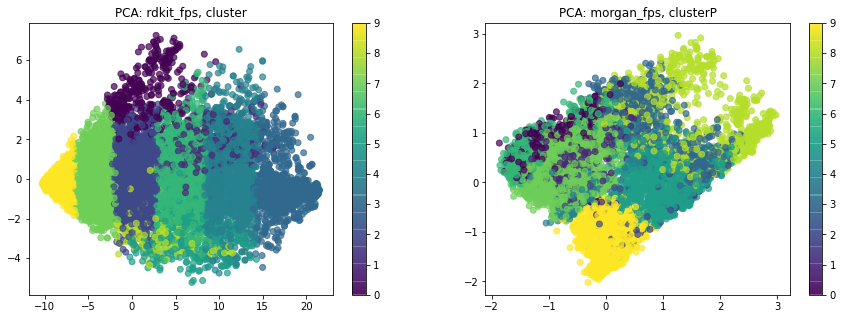

In [77]:
plt.figure(figsize = (15,5)) 
# rdkit
plt.subplot(1,2,1) 
plt.scatter(x1, y1, c = kmeans1.labels_, alpha = 0.7) 
plt.title("PCA: rdkit_fps, cluster") 
plt.colorbar() 
# morgan
plt.subplot(1,2,2) 
plt.scatter(x2, y2, c = kmeans2.labels_, alpha = 0.7)
plt.title("PCA: morgan_fps, clusterP") 
plt.colorbar()

## Downsampling based on clustering

decide to focus on rdkit fingerprint

In [106]:
from matplotlib import gridspec
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [131]:
dimension = fpsize
pca = PCA(n_components = dimension) 
decomp = pca.fit_transform(df_rdkfp_sdf) 
print(decomp)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[[-9.53314710e+00 -1.85774266e-01  6.75067506e-02 ...  2.79494941e-02
   3.14196537e-02 -2.21569894e-03]
 [ 1.44567642e+00 -1.09756971e+00  2.44064499e-01 ... -2.08669719e-01
   1.55280447e-01 -1.08520150e-01]
 [ 1.50197810e+01  1.50968266e+00  2.27972475e-01 ... -9.98359283e-02
  -2.29452493e-01 -1.44003212e-01]
 ...
 [-6.86395572e+00  1.12130441e+00 -3.80610027e-01 ... -1.64915215e-01
  -1.27595776e-01  3.81645778e-02]
 [-6.94013242e+00 -8.46027983e-01 -2.64932972e-01 ...  2.80690472e-02
  -1.79130519e-02 -7.67498940e-02]
 [-6.00286798e+00 -2.75920995e-01 -9.78219135e-01 ...  2.26114000e-01
  -5.18957953e-02 -5.00064060e-02]]
[3.08794373e-01 9.34001357e-03 8.19490749e-03 ... 1.53048136e-04
 1.15993823e-04 1.02587132e-04]
1.0


<Figure size 576x432 with 0 Axes>

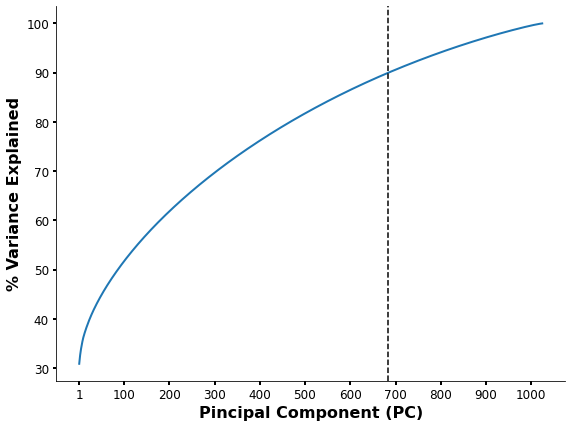

In [ ]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(pca.explained_variance_ratio_*100)
index = np.where(var>90)
threshold = index[0][0]

plt.plot([i+1 for i in range(len(var))],var,'-',linewidth=2)
plt.xticks([i+1 for i in range(len(var)) if i==0 or i%100 == 99])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)
plt.axvline(threshold, ls='--', c='k');
plt.savefig("./plots/rdkit_explained_var.png",
            bbox_inches='tight', 
             facecolor='w');

100%|██████████| 9/9 [00:57<00:00,  6.34s/it]


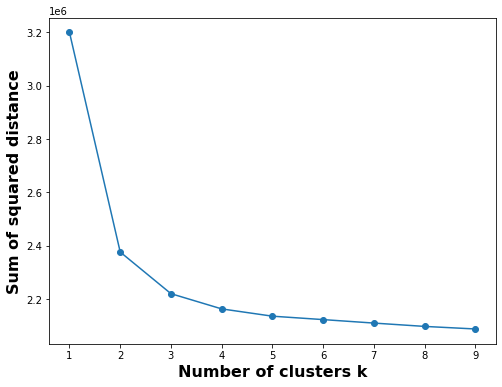

In [141]:
sse = []
list_k = list(range(1, 10))

for k in tqdm(list_k):
    km = KMeans(n_clusters=k)
    km.fit(df_pca[pc_range])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(8,6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k', fontsize=16,fontweight='bold')
plt.ylabel('Sum of squared distance', fontsize=16,fontweight='bold')
plt.savefig("./plots/rdkit_sum_sqdist.png",
            bbox_inches='tight', 
             facecolor='w');

In [138]:
df_pca= pd.DataFrame(decomp)
df_pca.index = df_rdkfp_sdf.index
# df_pca.columns = ['PC{}'.format(i+1) for i in df_pca.columns]
df_pca.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
HIGCEG,-9.533147,-0.185774,0.067507,0.027259,-0.447654,0.306746,-0.180064,-0.333814,0.048666,-0.000463,...,0.021849,0.008975,0.061346,0.004524,-0.077968,-0.043569,0.044278,0.027949,0.031420,-0.002216
BARROB,1.445676,-1.097570,0.244064,1.987159,0.260067,0.463919,-0.294884,-0.551228,0.652633,-0.966117,...,0.317063,0.001124,0.381924,-0.232242,0.188058,-0.341475,0.256495,-0.208670,0.155280,-0.108520
LEXJII,15.019781,1.509683,0.227972,0.313168,-0.089671,1.466883,1.403482,1.708531,1.380920,-0.150953,...,0.023302,0.272768,-0.047053,-0.237941,-0.125038,0.075639,0.133544,-0.099836,-0.229452,-0.144003
FISVIO,-6.714817,0.340912,-0.472252,0.610055,-0.233419,-0.589144,-0.399729,-0.339858,0.426189,-0.262700,...,0.199974,-0.002837,-0.169770,0.322641,-0.083209,0.048525,-0.035729,-0.058984,0.054248,0.097244
EJUXOX,-8.714019,-0.284337,-0.231746,-0.031947,-0.132295,0.010860,-0.013534,-0.039520,-0.262576,-0.216346,...,0.062108,0.072736,-0.227127,-0.085569,-0.133782,0.090568,0.117481,0.054362,0.050192,-0.007297
KACROY,-6.141174,-0.414385,0.073335,0.635195,0.123894,0.475573,0.032111,0.473628,0.502312,-0.380779,...,-0.197636,0.228167,-0.047129,0.065611,-0.006317,-0.195063,-0.211745,-0.016912,-0.029116,-0.038454
JECMUA,18.173048,-0.863530,0.104994,0.570939,-1.036723,0.010865,0.215240,-1.008013,0.171735,-0.249400,...,-0.300345,0.573281,0.149519,0.144884,-0.162629,-0.342228,-0.051209,-0.136960,-0.065764,0.075457
MESZUG,5.260583,-2.707462,-1.563412,-1.079626,1.486740,1.413964,-2.057207,0.182904,0.923758,-1.319407,...,0.360130,0.029457,0.123305,0.025669,0.360364,0.463390,-0.032594,-0.058090,0.072994,-0.165081
ROSDOS,13.005806,1.939185,4.732788,-2.515832,1.521578,-1.156573,-1.134726,-0.306964,-0.098697,0.431516,...,0.200918,0.014232,-0.282576,0.371191,-0.026154,-0.088968,-0.169264,-0.062907,0.168286,-0.232287
GIVCEV,3.032778,0.439919,0.230276,1.324341,0.412234,0.473705,0.881985,1.145155,0.408033,1.654406,...,0.130287,-0.073919,-0.183210,0.048612,-0.231911,0.107275,0.041628,-0.103873,-0.161305,-0.000774


In [ ]:
index = np.where(var>90)
threshold = index[0][0]


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
pc_range = np.arange(threshold)
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca[pc_range])
    silhouette_avg = silhouette_score(df_pca[pc_range], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(df_pca[pc_range], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[0], df_pca[1], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig("./plots/silhouette_var90_k"+str(n_clusters)+".png",
               bbox_inches='tight', 
               facecolor='w')
    
plt.show()

In [142]:
kmeans = KMeans(n_clusters=4, random_state=10)
clusters = kmeans.fit_predict(df_pca[pc_range])

df_pca['clustered'] = pd.Series(clusters, index=df_rdkfp_sdf.index)

df_group1 = df_rdkfp_sdf[df_pca['clustered'] == 0]
df_group2 = df_rdkfp_sdf[df_pca['clustered'] == 1]
df_group3 = df_rdkfp_sdf[df_pca['clustered'] == 2]
df_group4 = df_rdkfp_sdf[df_pca['clustered'] == 3]
code_group1 = df_group1.index
code_group2 = df_group2.index
code_group3 = df_group3.index
code_group4 = df_group4.index

In [144]:
print("size of group1: %d" %len(code_group1))
print("size of group2: %d" %len(code_group2))
print("size of group3: %d" %len(code_group3))
print("size of group4: %d" %len(code_group4))

size of group1: 4362
size of group2: 2162
size of group3: 6501
size of group4: 3238


In [147]:
len(code_group1)+len(code_group2)+len(code_group3)+len(code_group4) == len(df_rdkfp_sdf)

True

In [151]:
target_size = 900

group1_portion = int(np.round(target_size * len(code_group1)/len(df_rdkfp_sdf)))
group2_portion = int(np.round(target_size * len(code_group2)/len(df_rdkfp_sdf)))
group3_portion = int(np.round(target_size * len(code_group3)/len(df_rdkfp_sdf)))
group4_portion = int(np.round(target_size * len(code_group4)/len(df_rdkfp_sdf)))
group4_portion

179

In [153]:
import random
sub_group1 = random.choices(code_group1, k=group1_portion)
sub_group2 = random.choices(code_group2, k=group2_portion)
sub_group3 = random.choices(code_group3, k=group3_portion)
sub_group4 = random.choices(code_group4, k=group4_portion)

In [172]:
len(sub_group1+sub_group2+sub_group3+sub_group4)

900

In [186]:
len(sub_group4)

179

In [199]:
import shutil

xyz_file = []
for code in sub_group4:
    file = code+".xyz"
    xyz_file.append(file)

# copy candidate xyz files
src_path = repo_path+"/filtered_xyz_data/"
dst_path = repo_path+"/subset_xyz_data/"
for file in xyz_file:
    shutil.copy(src_path+file, dst_path)

In [206]:
np.arange(4)

array([0, 1, 2, 3])

In [207]:
files = os.listdir(repo_path+"/subset_xyz_data/")
len(files)

880

## Morgan fingerprint

[[ 1.23427732e+00  5.94781269e-01 -5.43509614e-01 ... -6.05952492e-02
   7.65685626e-02  4.28196047e-02]
 [-3.26385969e-02 -1.28480204e+00 -6.11927133e-02 ...  2.00996015e-02
   1.36736468e-02  1.93555639e-03]
 [-1.22246061e+00 -4.80327640e-02 -6.25262635e-01 ... -1.16042114e-02
  -8.78615619e-03  1.30733663e-02]
 ...
 [-9.38705879e-01  2.00750083e-01  1.49118415e+00 ... -3.63812631e-02
   7.47380436e-03 -1.37810187e-02]
 [ 1.41710040e+00  4.05785649e-01 -9.14165639e-01 ... -4.29683987e-02
   8.38941767e-03  1.29915549e-02]
 [ 2.16382026e+00  5.61733561e-01  2.12341686e-01 ...  5.67265982e-02
   5.60692015e-02 -1.83272062e-02]]
[0.03427773 0.03071965 0.0167736  ... 0.00017635 0.00017255 0.00015636]
1.0000000000000002


<Figure size 576x432 with 0 Axes>

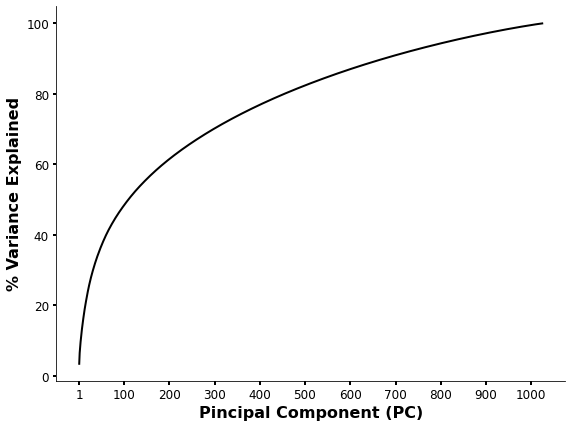

In [129]:
# dimension = fpsize
# pca = PCA(n_components = dimension) 
# decomp = pca.fit_transform(df_mgfp_sdf) 
# print(decomp)
# print(pca.explained_variance_ratio_)
# print(np.sum(pca.explained_variance_ratio_))
# plt.figure(figsize=(8,6))
# fig, ax = plt.subplots(figsize=(8,6))

# var=np.cumsum(pca.explained_variance_ratio_*100)
# plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
# plt.xticks([i+1 for i in range(len(var)) if i==0 or i%100 == 99])
# plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
# plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.tight_layout()
# plt.tick_params ('both',width=2,labelsize=12)

In [ ]:
df_pca= pd.DataFrame(decomp)
df_pca.index = df_mgfp_sdf.index


index = np.where(var>90)
threshold = index[0][0]


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
pc_range = np.arange(threshold)
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca[pc_range])
    silhouette_avg = silhouette_score(df_pca[pc_range], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(df_pca[pc_range], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[0], df_pca[1], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    # plt.savefig("./plots/silhouette_var90_k"+str(n_clusters)+".png",
    #            bbox_inches='tight', 
    #            facecolor='w')
    
plt.show()

## Find subset based on PCA

In [203]:
rdkfp_inv = df_rdkfp_sdf.T
rdkfp_inv

,HIGCEG,BARROB,LEXJII,FISVIO,EJUXOX,KACROY,JECMUA,MESZUG,ROSDOS,GIVCEV,...,OBAWOF,RUNVAY,TARTUC,ESIKAT,PANBAK,NAQXOU,FUBRUQ,APOFOC,UNEZIX,AJICON
0,1,0,0,1,1,1,0,1,1,0,...,0,1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,0,0,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
4,1,0,0,1,1,1,0,0,0,0,...,0,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1,1,0,1,1,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
1020,1,1,0,1,1,0,1,1,0,0,...,0,1,1,1,1,1,1,1,1,1
1021,1,0,0,1,1,1,0,1,0,1,...,0,1,1,1,1,1,1,1,0,1
1022,1,1,1,1,1,1,0,1,0,0,...,0,1,1,1,0,1,1,1,1,0


In [202]:
len(df_rdkfp_sdf)

16263

In [204]:
dimension = len(df_rdkfp_sdf)
pca = PCA(n_components = dimension) 
decomp = pca.fit_transform(rdkfp_inv) 
print(decomp)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(pca.explained_variance_ratio_*100)
index = np.where(var>90)
threshold = index[0][0]

plt.plot([i+1 for i in range(len(var))],var,'-',linewidth=2)
plt.xticks([i+1 for i in range(len(var)) if i==0 or i%100 == 99])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)
plt.axvline(threshold, ls='--', c='k');
plt.savefig("./plots/rdkit_explained_var.png",
            bbox_inches='tight', 
             facecolor='w');

ValueError: n_components=16263 must be between 0 and min(n_samples, n_features)=1024 with svd_solver='full'